In [1]:
# packages to record the day of fetching headlines  
import datetime
import nepali_datetime
miti = nepali_datetime.date.today().strftime('%K-%n-%D (%k %N %G)')

In [2]:
# packages to use
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import re
print(miti)

२०७९-०४-०८ (७९ श्रावण आइतबार)


In [3]:
# my function, soupify, fetches headlines from a list of news sites
def soupify (patrika = []):
    
    pagefile = open("homepages25.txt", "r", -1, "utf-8").read()
    
    patrika = [] # populate the list of URLs to visit for headlines 
    for url in pagefile.splitlines():
        try:
            if "\ufeff" in url:
                patrika.append(str(url.replace("\ufeff", "")))
            else:
                patrika.append(str(url))
        except:
            "Sorry, something wrong. Try again later."
    
    bowl = [] # list of response objects in the bowl
    for paper in patrika:
        try:
            r = requests.get(paper)
            bowl.append(r)
        except:
            "Sorry, something wrong. Try again later."
    
    soup = [] # list of BeautifulSoup objects 
    for r in bowl:
        try:
            spoon = bs(r.text, "html.parser")
            soup.append(spoon)
        except:
            "Sorry, something wrong. Try again later."
    return soup

In [4]:
# looking at the alphapet soup on the websites  
mixed_soup = soupify(patrika = [])

In [5]:
headlines = []
heading_tags = ["h1", "h2", "h3", "h4", "h5", "h6"]
for ms in mixed_soup:
    for tags in ms.find_all(heading_tags):
        headlines.append(tags.text.strip())
        #print(tags.name + ' -> ' + tags.text.strip())

In [6]:
headlines[:5]

['हाम्रोबारे',
 'लिङ्कहरू',
 'लिङ्कहरू',
 'लोकप्रिय समाचार',
 'भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै']

In [7]:
df = pd.DataFrame(headlines)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3002 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [9]:
df.columns = ["headline"]

In [10]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)

,headline
0,हाम्रोबारे
1,लिङ्कहरू
2,लोकप्रिय समाचार
3,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै
4,मस्को प्रस्तावित सम्झौतामा ट्वीटरले खर्च गर्‍य...
...,...
2389,चोरी गरेर अमेरिका पुरयाइएको टुँडाल फर्काइयो
2390,चलचित्र ‘म’को ट्रेलर सार्वजनिक
2391,फिल्म ‘माइकल अधिकारी’को ट्रेलर सार्वजनिक
2392,गोल्डेन ओक १२औं कृति अवार्ड २६ भदौमा


In [11]:
stopfile = open("nepali_stopwords.txt", "r", -1, "utf-8").read()

nepali_stopwords = [] # populate the list of URLs to visit for headlines 
for word in stopfile.splitlines():
    nepali_stopwords.append(str(word))

In [12]:
df['headline'] = df['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nepali_stopwords)]))

In [13]:
df.head()

,headline
0,हाम्रोबारे
1,
2,
3,
4,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै


In [14]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)

,headline
0,हाम्रोबारे
1,
2,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै
3,मस्को प्रस्तावित सम्झौतामा ट्वीटरले खर्च गर्‍य...
4,चीनले नेपालको सीमाछेउ विवादित क्षेत्रमा राजमार...
...,...
2271,चोरी अमेरिका पुरयाइएको टुँडाल फर्काइयो
2272,चलचित्र ‘म’को ट्रेलर सार्वजनिक
2273,फिल्म ‘माइकल अधिकारी’को ट्रेलर सार्वजनिक
2274,गोल्डेन ओक १२औं कृति अवार्ड २६ भदौमा


In [15]:
import nltk
from nltk.tokenize import word_tokenize
df['head_token']=df['headline'].apply(word_tokenize)
df.head(10)

,headline,head_token
0,हाम्रोबारे,[हाम्रोबारे]
1,,[]
2,,[]
3,,[]
4,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै,"[भारतबाट, फर्कनेमा, कोरोनाको, सङ्क्रमण, देखिँदै]"
5,मस्को प्रस्तावित सम्झौतामा ट्वीटरले खर्च गर्‍य...,"[मस्को, प्रस्तावित, सम्झौतामा, ट्वीटरले, खर्च,..."
6,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै,"[भारतबाट, फर्कनेमा, कोरोनाको, सङ्क्रमण, देखिँदै]"
7,चीनले नेपालको सीमाछेउ विवादित क्षेत्रमा राजमार...,"[चीनले, नेपालको, सीमाछेउ, विवादित, क्षेत्रमा, ..."
8,"रुपन्देहीमा सातामा ट्रक कपडा बरामद, प्रहरी छाड...","[रुपन्देहीमा, सातामा, ट्रक, कपडा, बरामद, ,, प्..."
9,गाँजाको बोट नष्ट तनहुँ प्रहरी,"[गाँजाको, बोट, नष्ट, तनहुँ, प्रहरी]"


In [ ]:
#df.drop(columns = ['headline'])

In [16]:
df = df.drop([0, 1, 2, 3])

In [17]:
df.head()

,headline,head_token
4,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै,"[भारतबाट, फर्कनेमा, कोरोनाको, सङ्क्रमण, देखिँदै]"
5,मस्को प्रस्तावित सम्झौतामा ट्वीटरले खर्च गर्‍य...,"[मस्को, प्रस्तावित, सम्झौतामा, ट्वीटरले, खर्च,..."
6,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै,"[भारतबाट, फर्कनेमा, कोरोनाको, सङ्क्रमण, देखिँदै]"
7,चीनले नेपालको सीमाछेउ विवादित क्षेत्रमा राजमार...,"[चीनले, नेपालको, सीमाछेउ, विवादित, क्षेत्रमा, ..."
8,"रुपन्देहीमा सातामा ट्रक कपडा बरामद, प्रहरी छाड...","[रुपन्देहीमा, सातामा, ट्रक, कपडा, बरामद, ,, प्..."


In [18]:
df['head_token'] = df['head_token'].apply(lambda x: [item for item in x if item not in nepali_stopwords])

In [19]:
df.head()

,headline,head_token
4,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै,"[भारतबाट, फर्कनेमा, कोरोनाको, सङ्क्रमण, देखिँदै]"
5,मस्को प्रस्तावित सम्झौतामा ट्वीटरले खर्च गर्‍य...,"[मस्को, प्रस्तावित, सम्झौतामा, ट्वीटरले, खर्च,..."
6,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै,"[भारतबाट, फर्कनेमा, कोरोनाको, सङ्क्रमण, देखिँदै]"
7,चीनले नेपालको सीमाछेउ विवादित क्षेत्रमा राजमार...,"[चीनले, नेपालको, सीमाछेउ, विवादित, क्षेत्रमा, ..."
8,"रुपन्देहीमा सातामा ट्रक कपडा बरामद, प्रहरी छाड...","[रुपन्देहीमा, सातामा, ट्रक, कपडा, बरामद, ,, प्..."


In [20]:
df['head_string'] = df['head_token'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))

In [21]:
df.head()

,headline,head_token,head_string
4,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै,"[भारतबाट, फर्कनेमा, कोरोनाको, सङ्क्रमण, देखिँदै]",भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै
5,मस्को प्रस्तावित सम्झौतामा ट्वीटरले खर्च गर्‍य...,"[मस्को, प्रस्तावित, सम्झौतामा, ट्वीटरले, खर्च,...",मस्को प्रस्तावित सम्झौतामा ट्वीटरले खर्च गर्‍य...
6,भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै,"[भारतबाट, फर्कनेमा, कोरोनाको, सङ्क्रमण, देखिँदै]",भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै
7,चीनले नेपालको सीमाछेउ विवादित क्षेत्रमा राजमार...,"[चीनले, नेपालको, सीमाछेउ, विवादित, क्षेत्रमा, ...",चीनले नेपालको सीमाछेउ विवादित क्षेत्रमा राजमार...
8,"रुपन्देहीमा सातामा ट्रक कपडा बरामद, प्रहरी छाड...","[रुपन्देहीमा, सातामा, ट्रक, कपडा, बरामद, ,, प्...",रुपन्देहीमा सातामा ट्रक कपडा बरामद प्रहरी छाड्...


In [48]:
text = ' '.join([word for word in df['head_string']]).replace("\u200d", " ")

In [49]:
text[0:200]

'भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै मस्को प्रस्तावित सम्झौतामा ट्वीटरले खर्च गर् यो मिलियन भारतबाट फर्कनेमा कोरोनाको सङ्क्रमण देखिँदै चीनले नेपालको सीमाछेउ विवादित क्षेत्रमा राजमार्ग बनाउँदै भा'

In [50]:
tokenized_words = word_tokenize(text)

In [51]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'२०७९': 148, 'साउन': 66, 'नेपाली': 61, 'मृत्यु': 60, 'नेपाल': 58, 'घोषणा': 52, 'नागरिकता': 47, 'करोड': 41, 'आईतवार': 41, 'कोरोना': 39, ...})

In [52]:
print(fdist.most_common(200), " ")

[('२०७९', 148), ('साउन', 66), ('नेपाली', 61), ('मृत्यु', 60), ('नेपाल', 58), ('घोषणा', 52), ('नागरिकता', 47), ('करोड', 41), ('आईतवार', 41), ('कोरोना', 39), ('मौद्रिक', 39), ('पक्राउ', 37), ('श्रावण,८', 36), ('विधेयक', 35), ('जनाको', 35), ('सार्वजनिक', 35), ('संक्रमण', 33), ('राष्ट्रिय', 32), ('बढ्यो', 31), ('अवस्थामा', 30), ('सरकारको', 29), ('हजार', 28), ('किशोरी', 27), ('फेला', 27), ('तयारी', 27), ('मन्त्री', 26), ('प्रहरी', 25), ('हुँदै', 25), ('सेयर', 25), ('पारित', 24), ('प्रदर्शन', 24), ('भारत', 23), ('पौडेल', 23), ('बैठक', 23), ('विकास', 23), ('महिला', 23), ('जनामा', 23), ('अध्यक्ष', 22), ('बैंकको', 22), ('सरकार', 21), ('प्रचण्ड', 21), ('नेता', 21), ('नीति', 21), ('देशमा', 21), ('प्रतिशत', 21), ('बढ्दै', 20), ('अन्तिम', 20), ('बैंक', 20), ('हत्या', 20), ('सङ्क्रमण', 19), ('विकासका', 19), ('भारतमा', 19), ('कारण', 19), ('भारतीय', 18), ('अभियान', 18), ('वर्षमा', 18), ('अर्ब', 18), ('पुष्टि', 18), ('महिलाको', 18), ('घाइते', 18), ('भ्रमण', 18), ('खर्च', 17), ('झुण्डिएको', 17), ('वितरण

In [64]:
dff = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

In [92]:
dfftop = dff.sort_values(by = 'frequency', axis=0, ascending=False, inplace=False, kind='quicksort', 
                na_position='last', ignore_index=False, key=None)

In [93]:
import plotly.express as px

In [96]:
px.bar(dfftop.head(20), x = 'frequency', 
       y = 'word',color = 'word', 
       height = 500,hover_data = ['word', 'frequency'])

In [98]:
px.bar(dfftop.head(100), x="frequency", y="word", color="word", 
       hover_data=["word", "frequency"], height=400)

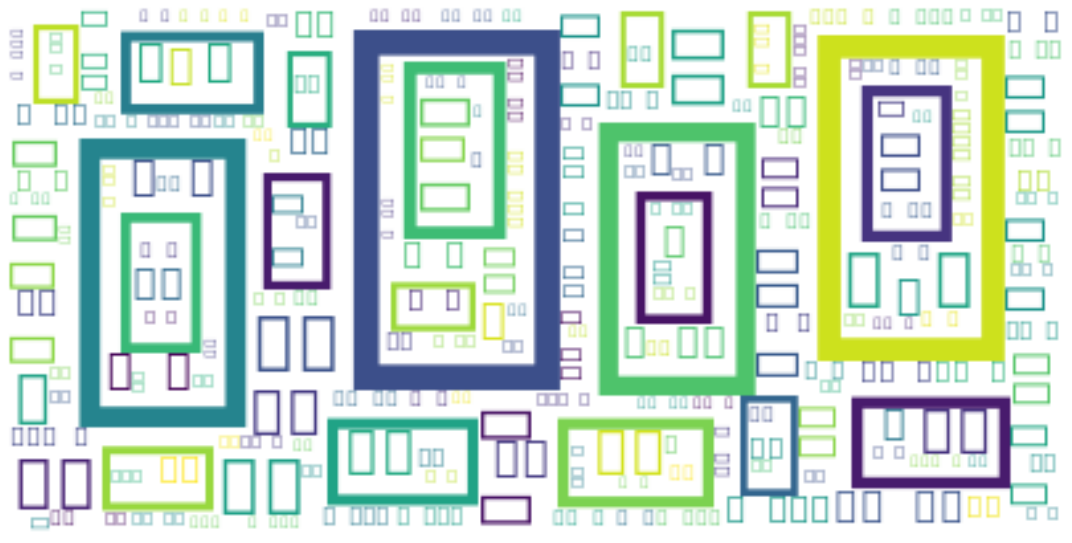

In [103]:
text = " ".join(i for i in df.head_string)
stopwords = set(nepali_stopwords)
wordcloud = WordCloud(file_path= 
                      stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'fclist' is not recognized as an internal or external command,
operable program or batch file.
